In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Breast_cancer_data.csv")
df

,mean_radius,mean_texture,mean_perimeter,diagnosis
0,17.99,10.38,122.80,0
1,20.57,17.77,132.90,0
2,19.69,21.25,130.00,0
3,11.42,20.38,77.58,0
4,20.29,14.34,135.10,0
...,...,...,...,...
564,21.56,22.39,142.00,0
565,20.13,28.25,131.20,0
566,16.60,28.08,108.30,0
567,20.60,29.33,140.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mean_radius     569 non-null    float64
 1   mean_texture    569 non-null    float64
 2   mean_perimeter  569 non-null    float64
 3   diagnosis       569 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.9 KB


In [4]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,diagnosis
count,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,0.627417
std,3.524049,4.301036,24.298981,0.483918
min,6.981000,9.710000,43.790000,0.000000
25%,11.700000,16.170000,75.170000,0.000000
50%,13.370000,18.840000,86.240000,1.000000
75%,15.780000,21.800000,104.100000,1.000000
max,28.110000,39.280000,188.500000,1.000000


In [5]:
df.isna().sum()

mean_radius       0
mean_texture      0
mean_perimeter    0
diagnosis         0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

<Axes: >

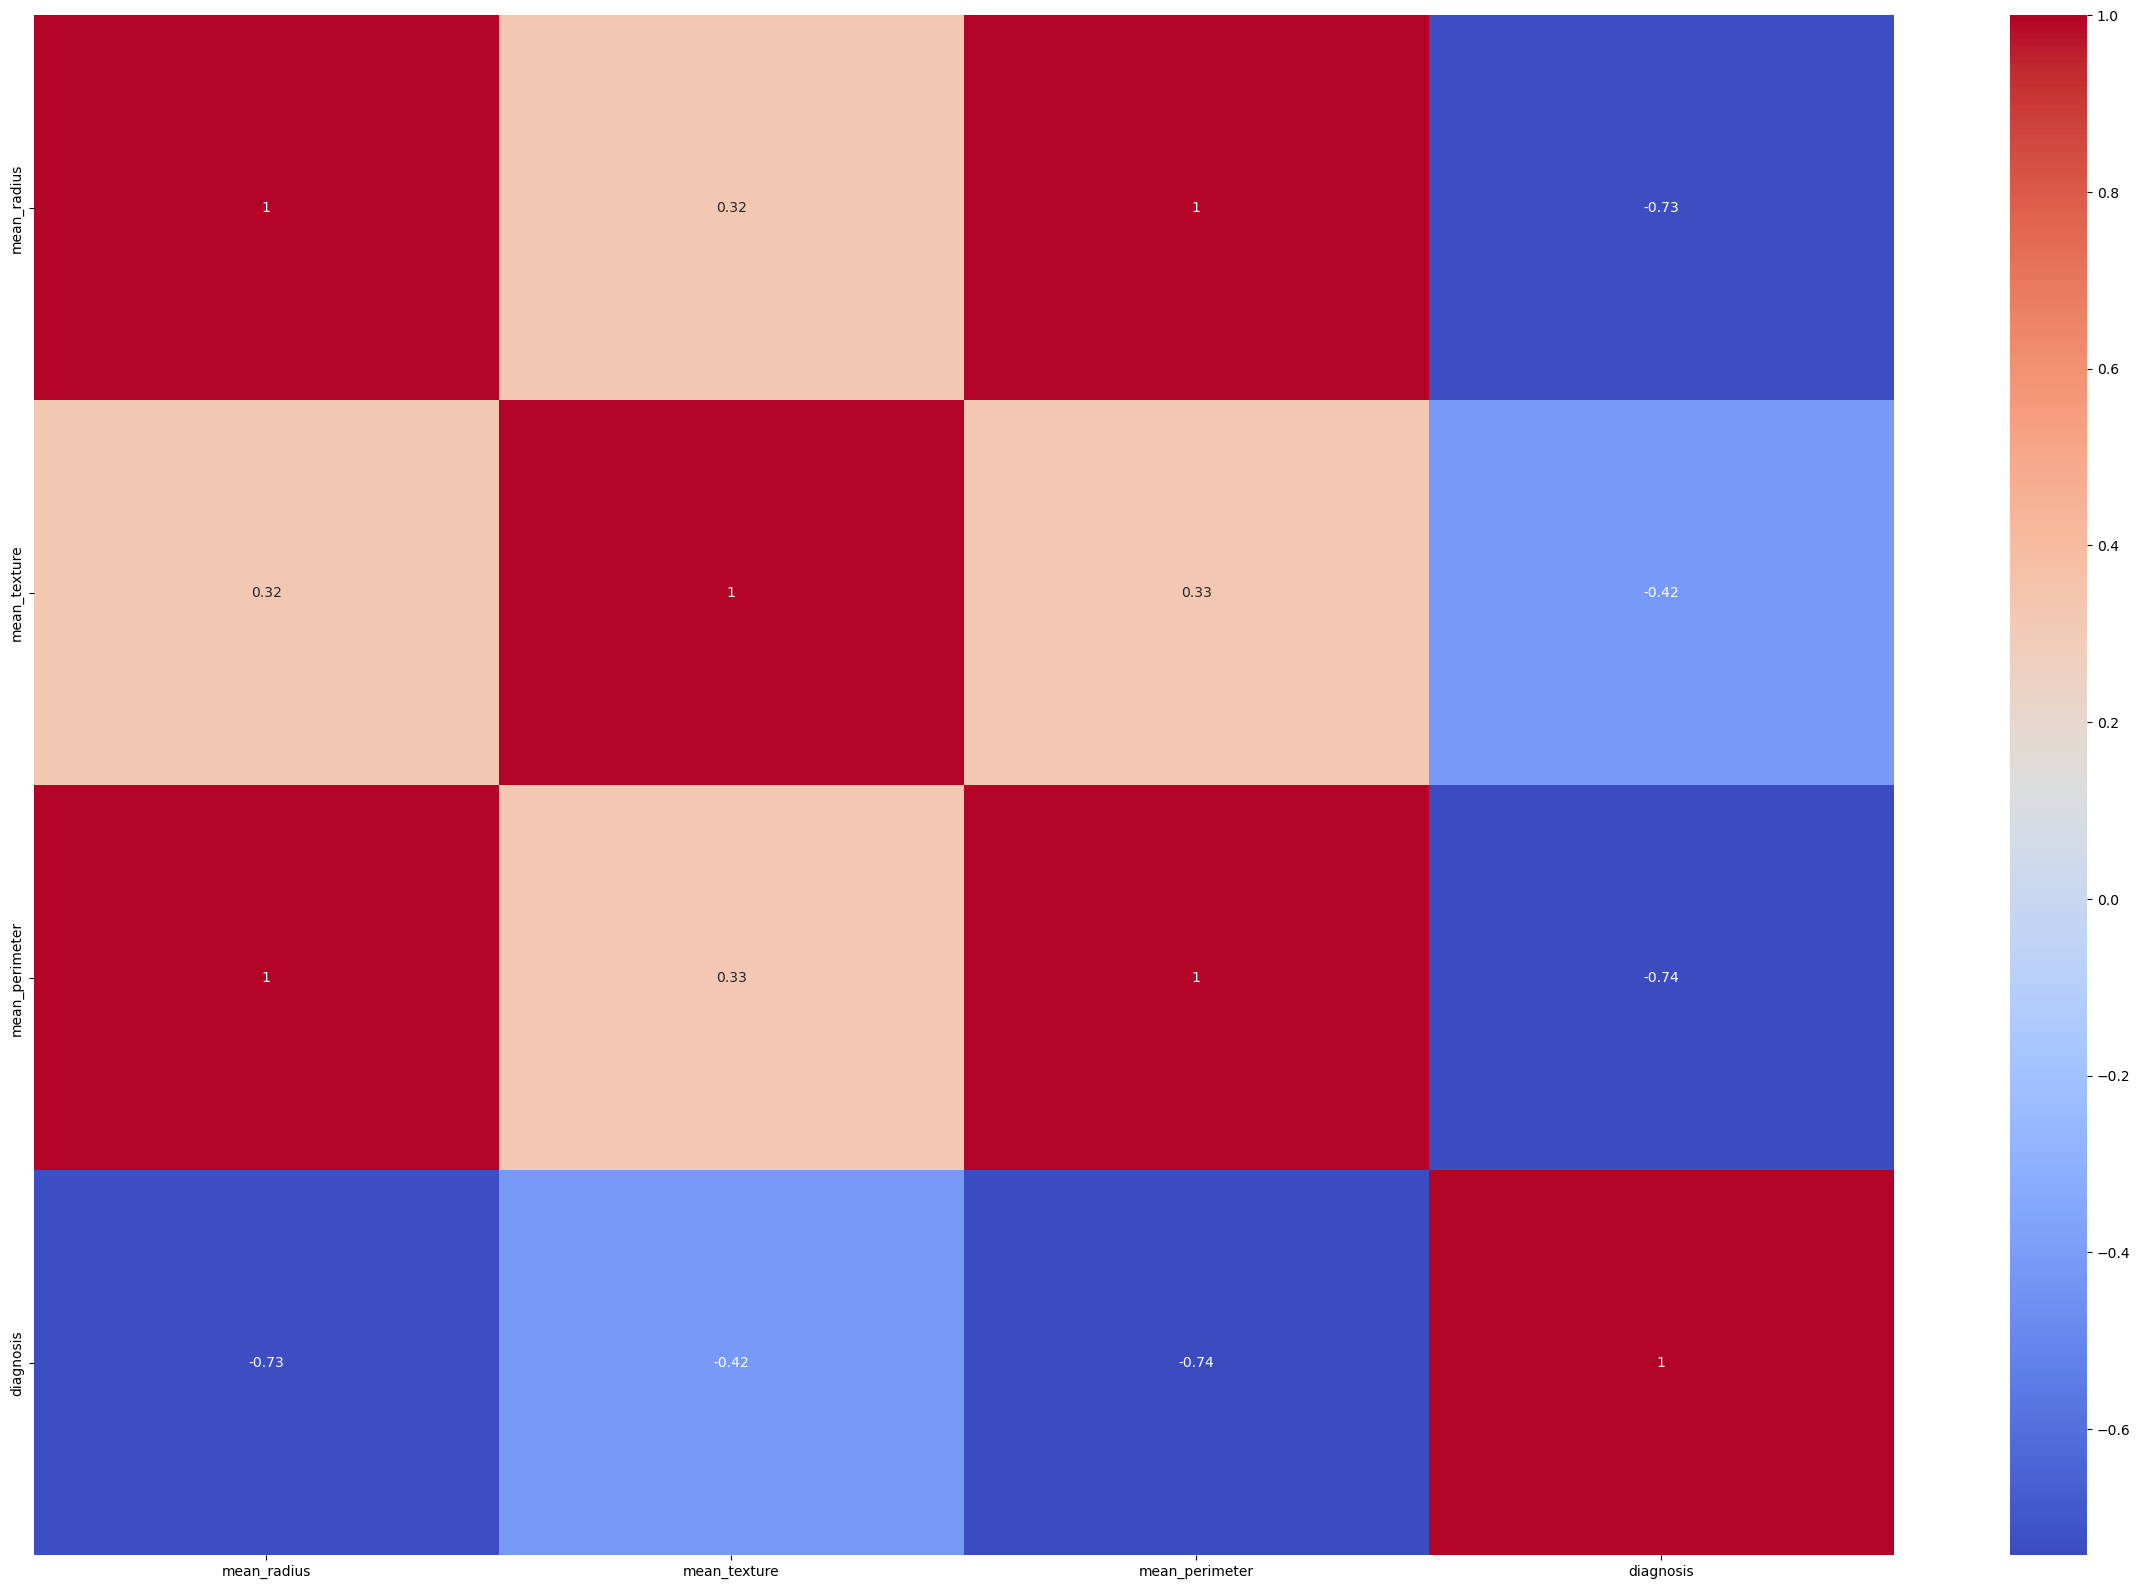

In [8]:
corr = df[num_cols].corr()
plt.figure(figsize=(30, 20))
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [9]:
df[cat_cols].nunique()

Series([], dtype: float64)

array([[<Axes: title={'center': 'mean_radius'}>,
        <Axes: title={'center': 'mean_texture'}>],
       [<Axes: title={'center': 'mean_perimeter'}>,
        <Axes: title={'center': 'diagnosis'}>]], dtype=object)

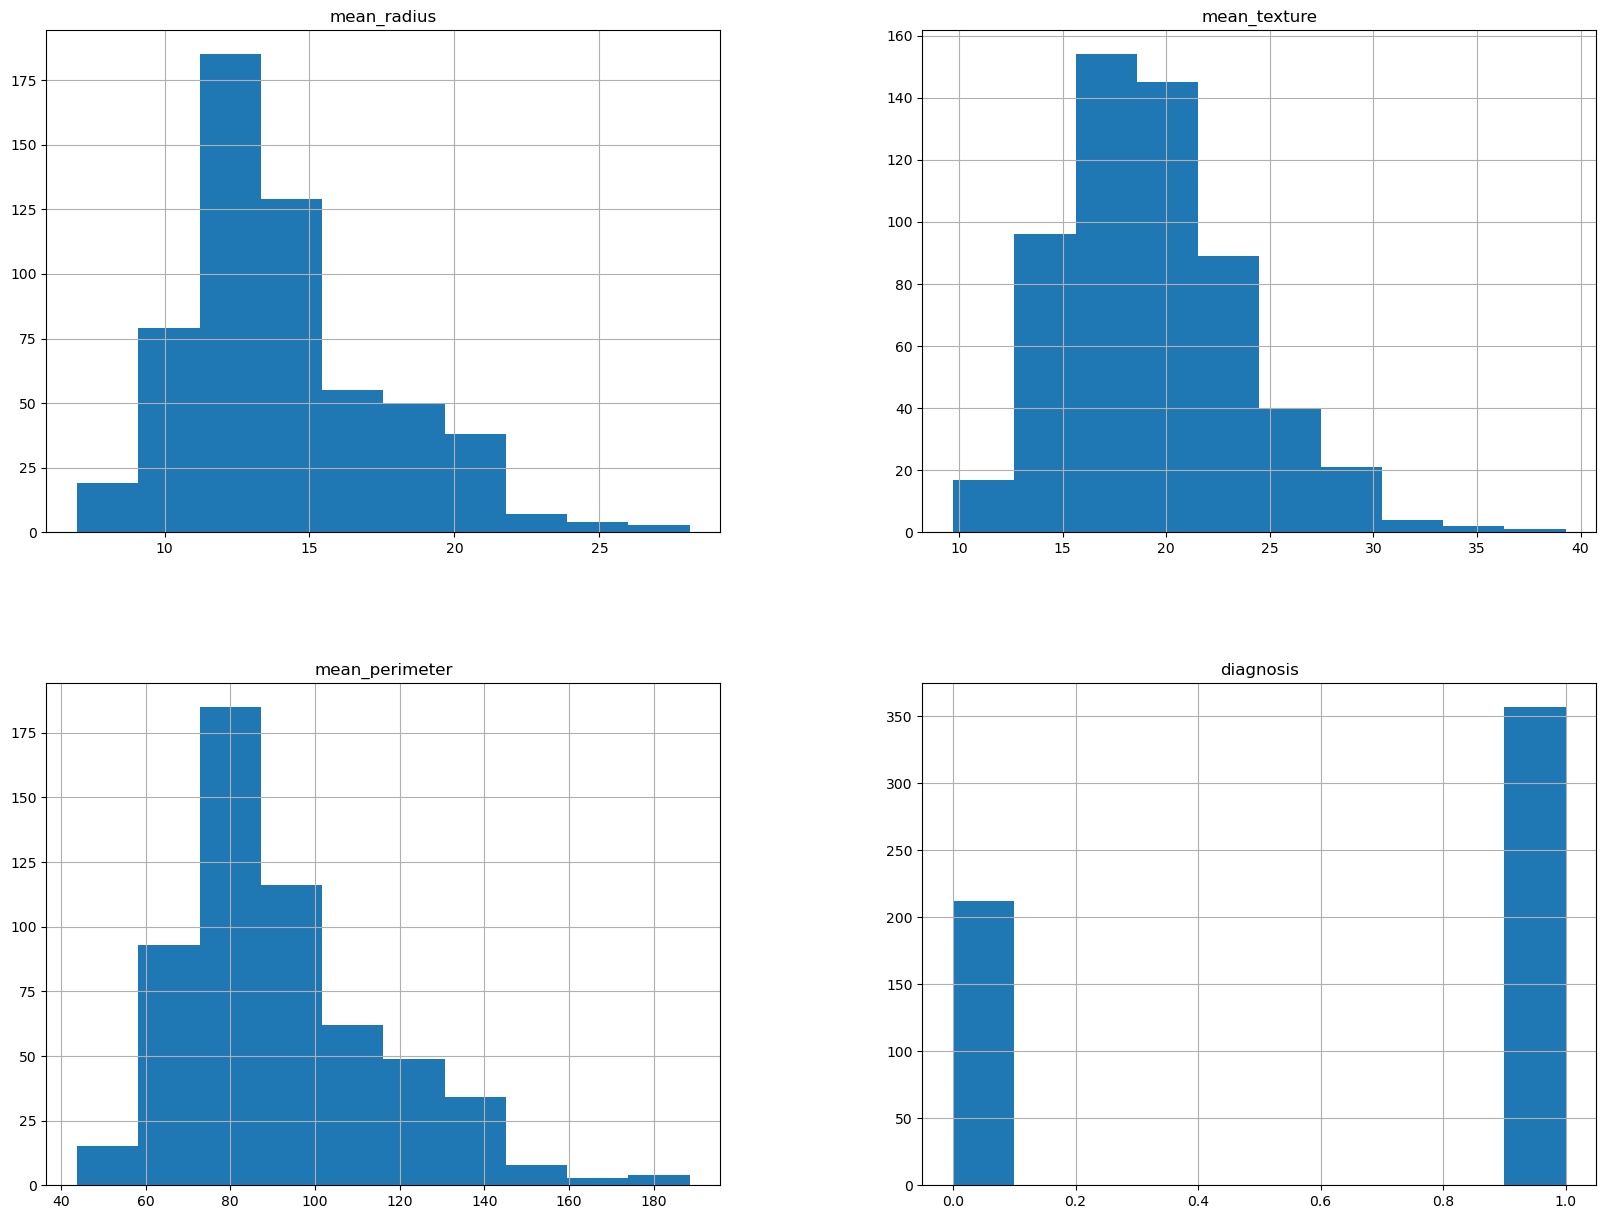

In [10]:
df.hist(figsize=(20, 15))

In [11]:
df[cat_cols].nunique()

Series([], dtype: float64)

In [12]:
df['diagnosis'] = df.diagnosis.astype('category').cat.codes
df.diagnosis

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int8

In [15]:
#training and testing data
from sklearn.model_selection import train_test_split
X = df.drop("diagnosis", axis=1)
y = df.diagnosis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=21)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 3), (455,), (114, 3), (114,))

In [14]:
#model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC())

In [16]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9120879120879121

In [17]:
clf.score(X_test, y_test)

0.8771929824561403

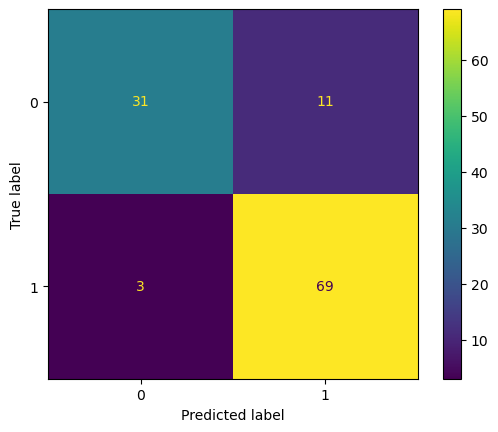

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, cmap='viridis')

In [23]:
#Predicting Results
y_pred = clf.predict(X_test)
#Calculating Resulta
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
print("accuracy score: {0}%".format(accuracy_score(y_test, y_pred) * 100))

Confusion Matrix: 
 [[31 11]
 [ 3 69]]
accuracy score: 87.71929824561403%


In [24]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
rmacc = accuracy_score(y_test, y_pred)
print('Accuracy Score: ' + str(rmacc)*100)
print('Precision Score: ' + str(precision_score(y_test, y_pred))*100)
print('Recall Score: ' + str(recall_score(y_test, y_pred))*100)
print('F1 Score: ' + str(f1_score(y_test, y_pred))*100)

Accuracy Score: 0.8771929824561403
Precision Score: 0.8625
Recall Score: 0.9583333333333334
F1 Score: 0.9078947368421054
